In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

file_path = "./Drug.csv"
df = pd.read_csv(file_path)
quantitative_stats = df[['Age', 'Na', 'K']].describe()

In [4]:
sex_counts = df['Sex'].value_counts()
bp_counts = df['BP'].value_counts()
cholesterol_counts = df['Cholesterol'].value_counts()
drug_counts = df['Drug'].value_counts()

In [5]:
sex_percentage = (sex_counts / len(df)) * 100
bp_percentage = (bp_counts / len(df)) * 100
cholesterol_percentage = (cholesterol_counts / len(df)) * 100
drug_percentage = (drug_counts / len(df)) * 100


In [6]:
sex_summary = pd.concat([sex_counts, sex_percentage], axis=1)
bp_summary = pd.concat([bp_counts, bp_percentage], axis=1)
cholesterol_summary = pd.concat([cholesterol_counts, cholesterol_percentage], axis=1)
drug_summary = pd.concat([drug_counts, drug_percentage], axis=1)


In [7]:
correlation_matrix = df[['Age', 'Na', 'K']].corr()

In [11]:
import pandas as pd
file_path = "./Drug.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
quantitative_stats = df[['Age', 'Na', 'K']].describe()
sex_counts = df['Sex'].value_counts()
bp_counts = df['BP'].value_counts()
cholesterol_counts = df['Cholesterol'].value_counts()
drug_counts = df['Drug'].value_counts()
print("Statistical Summary for Quantitative Features:")
print(quantitative_stats)
print("\nFrequency Table for Sex:")
print(sex_counts)
print("\nFrequency Table for Blood Pressure:")
print(bp_counts)
print("\nFrequency Table for Cholesterol:")
print(cholesterol_counts)
print("\nFrequency Table for Drug (Target Variable):")
print(drug_counts)

   Age Sex      BP Cholesterol        Na         K   Drug
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY
1   47   M     LOW        HIGH  0.739309  0.056468  drugC
2   47   M     LOW        HIGH  0.697269  0.068944  drugC
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX
4   61   F     LOW        HIGH  0.559294  0.030998  drugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB
None
Statistical Summary for Quantitative Features:
              Age          Na           K
count  200.00

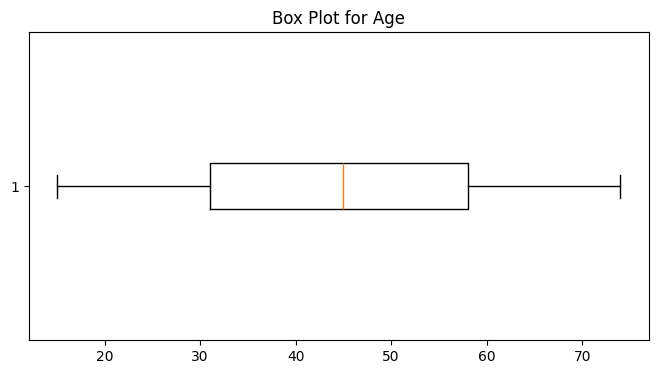

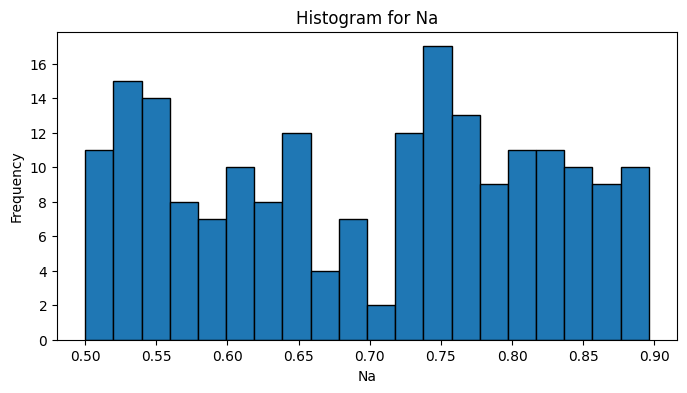

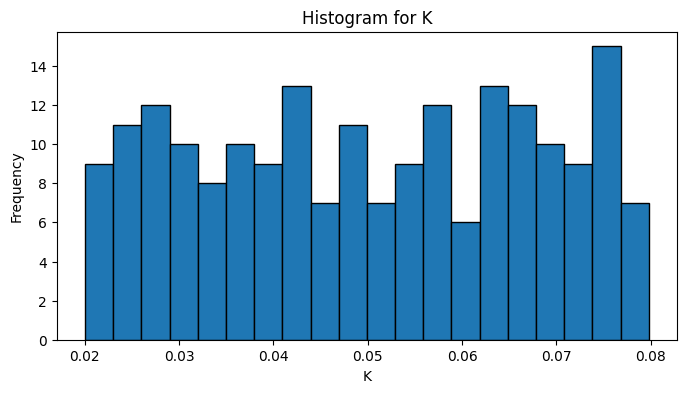

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.boxplot(df['Age'], vert=False)
plt.title('Box Plot for Age')
plt.show()
plt.figure(figsize=(8, 4))
plt.hist(df['Na'], bins=20, edgecolor='k')
plt.title('Histogram for Na')
plt.xlabel('Na')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 4))
plt.hist(df['K'], bins=20, edgecolor='k')
plt.title('Histogram for K')
plt.xlabel('K')
plt.ylabel('Frequency')
plt.show()

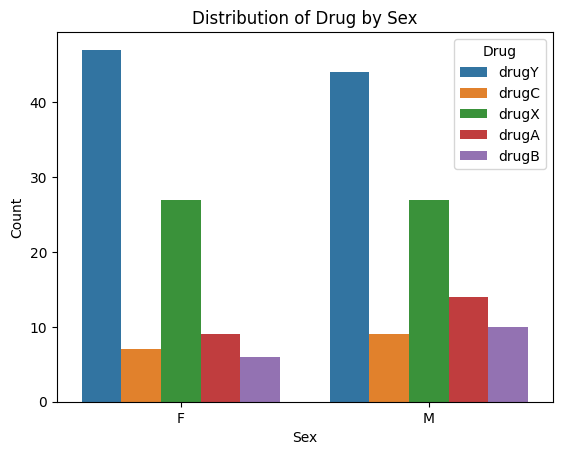

In [13]:
import seaborn as sns
sns.countplot(x='Sex', hue='Drug', data=df)
plt.title('Distribution of Drug by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

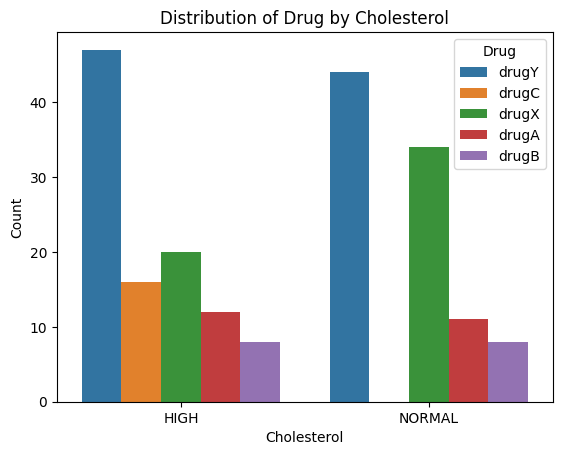

In [14]:
sns.countplot(x='Cholesterol', hue='Drug', data=df)
plt.title('Distribution of Drug by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

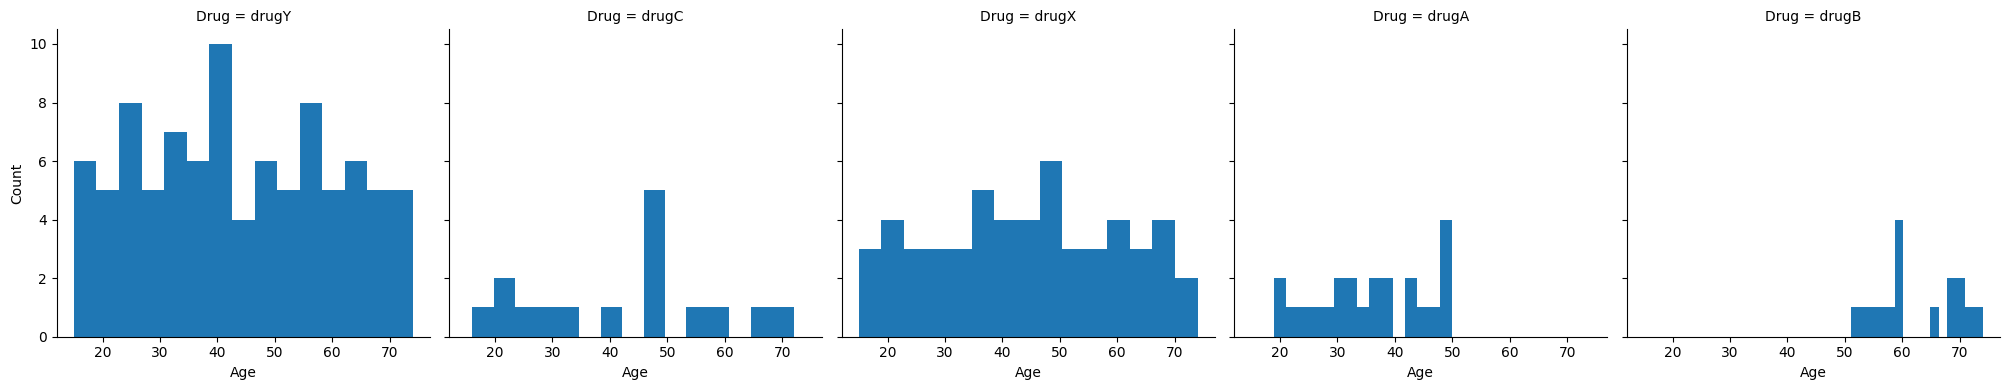

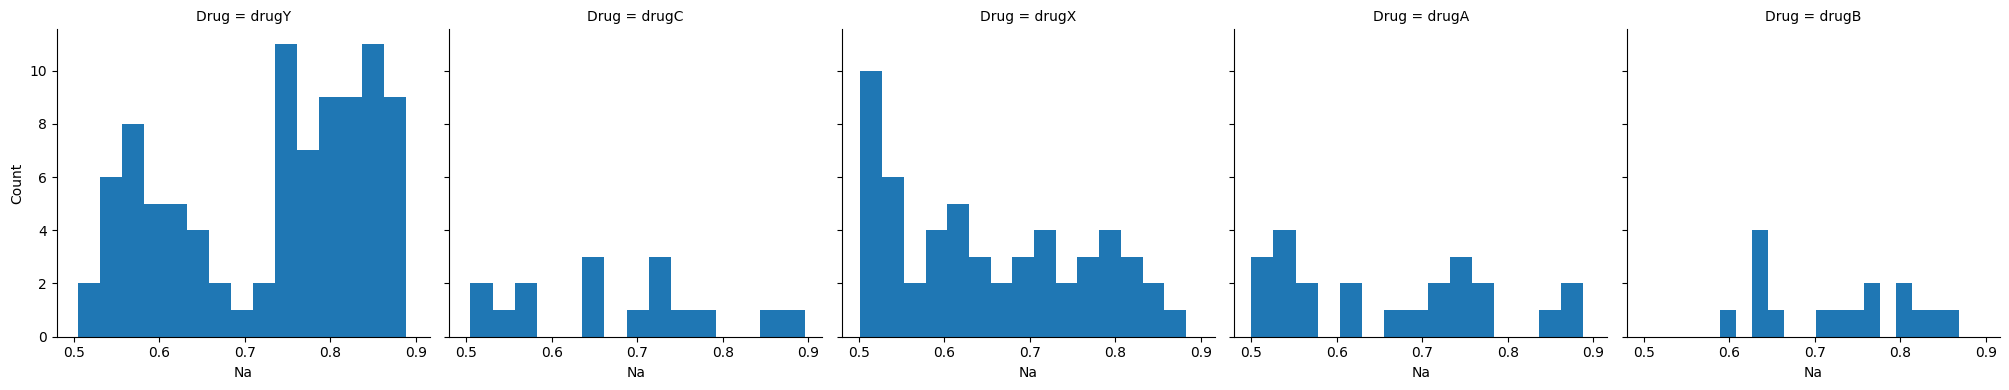

In [15]:
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'Age', bins=15)
g.set_axis_labels('Age', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'Na', bins=15)
g.set_axis_labels('Na', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()

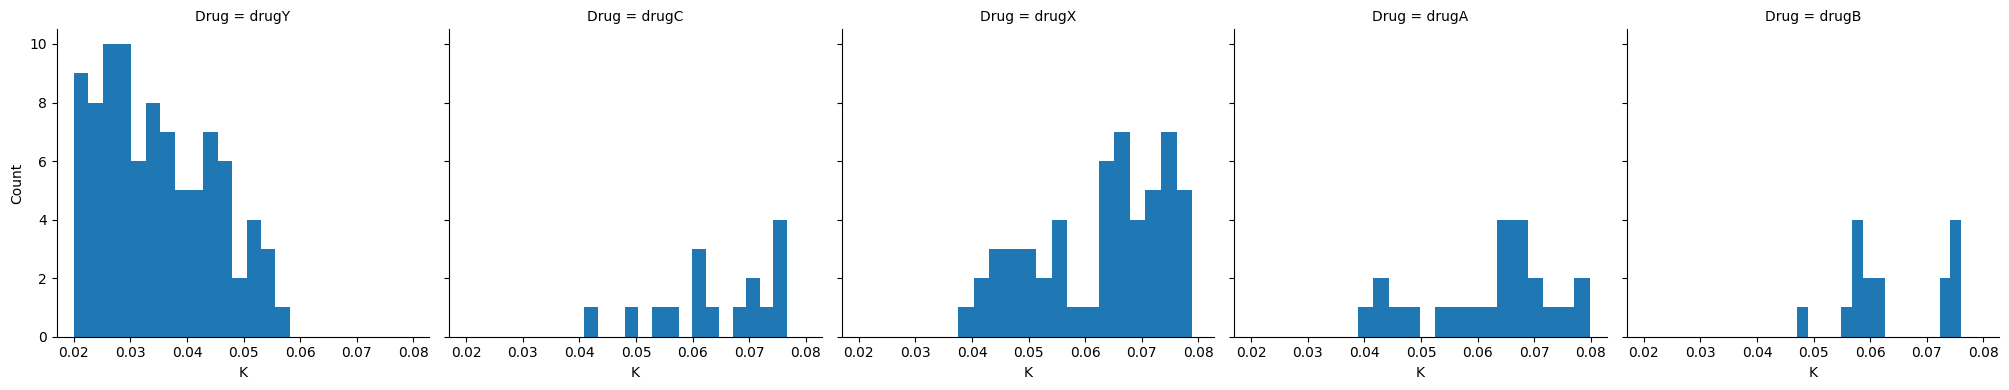

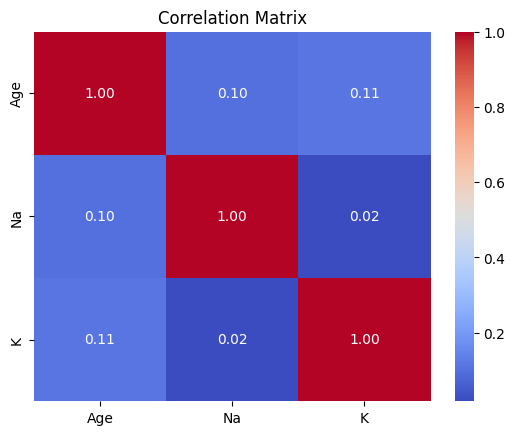

In [16]:
g = sns.FacetGrid(df, col='Drug', height=4)
g.map(plt.hist, 'K', bins=15)
g.set_axis_labels('K', 'Count')
g.set_titles('Drug = {col_name}')
plt.show()
correlation_matrix = df[['Age', 'Na', 'K']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation between Na and K:
Pearson's correlation coefficient: 0.0173 (p-value: 0.8075)
Spearman's rank correlation coefficient: -0.0052 (p-value: 0.9417)


Correlation between Na and Age:
Pearson's correlation coefficient: 0.1004 (p-value: 0.1573)
Spearman's rank correlation coefficient: 0.0931 (p-value: 0.1900)


Correlation between K and Age:
Pearson's correlation coefficient: 0.1115 (p-value: 0.1160)
Spearman's rank correlation coefficient: 0.1094 (p-value: 0.1230)




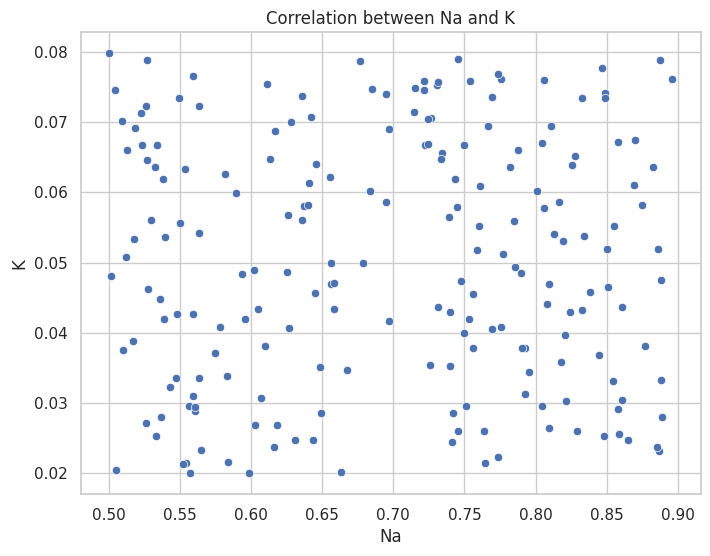

In [17]:
import scipy.stats as stats
numerical_features = ['Na', 'K', 'Age']
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        pearson_corr, pearson_p_value = stats.pearsonr(df[feature1], df[feature2])
        spearman_corr, spearman_p_value = stats.spearmanr(df[feature1], df[feature2])
        print(f"Correlation between {feature1} and {feature2}:")
        print(f"Pearson's correlation coefficient: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")
        print(f"Spearman's rank correlation coefficient: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")
        print("\n")
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Na", y="K", data=df)
plt.title("Correlation between Na and K")
plt.xlabel("Na")
plt.ylabel("K")
plt.show()

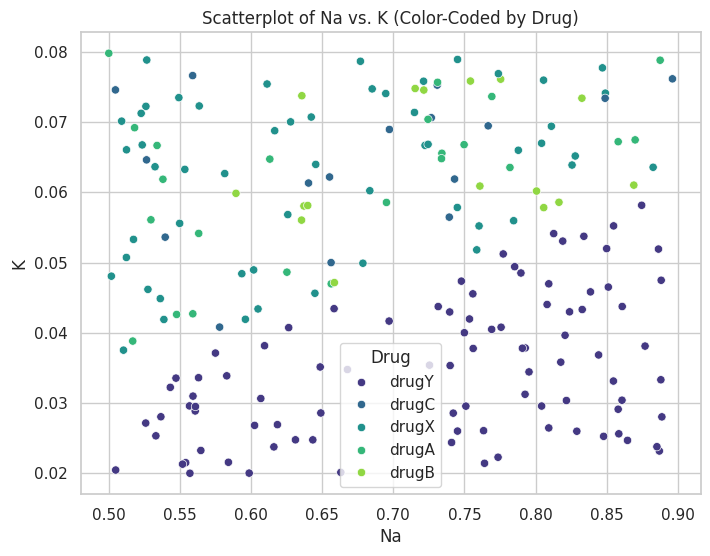

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Na", y="K", hue="Drug", data=df, palette="viridis")
plt.title("Scatterplot of Na vs. K (Color-Coded by Drug)")
plt.xlabel("Na")
plt.ylabel("K")
plt.legend(title="Drug")
plt.show()


In [19]:
import pandas as pd
import scipy.stats as stats
contingency_table = pd.crosstab(df['Drug'], df['Sex'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("\nExpected Frequencies:")
print(expected)

Contingency Table:
Sex     F   M
Drug         
drugA   9  14
drugB   6  10
drugC   7   9
drugX  27  27
drugY  47  44

Chi-Squared Statistic: 2.119248418109203
Degrees of Freedom: 4
p-value: 0.7138369773987128

Expected Frequencies:
[[11.04 11.96]
 [ 7.68  8.32]
 [ 7.68  8.32]
 [25.92 28.08]
 [43.68 47.32]]


In [20]:
df['Na/K'] = df['Na'] / df['K']


print(df.head())

   Age Sex      BP Cholesterol        Na         K   Drug       Na/K
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY  25.354629
1   47   M     LOW        HIGH  0.739309  0.056468  drugC  13.092530
2   47   M     LOW        HIGH  0.697269  0.068944  drugC  10.113556
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX   7.797618
4   61   F     LOW        HIGH  0.559294  0.030998  drugY  18.042906


In [21]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder


sex_mapping = {'F': 0, 'M': 1}
df['Sex_encoded'] = df['Sex'].map(sex_mapping)


bp_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
df['BP_encoded'] = df['BP'].map(bp_mapping)


cholesterol_mapping = {'NORMAL': 0, 'HIGH': 1}
df['Cholesterol_encoded'] = df['Cholesterol'].map(cholesterol_mapping)


label_encoder = LabelEncoder()
df['Drug_encoded'] = label_encoder.fit_transform(df['Drug'])


print(df.head())

   Age Sex      BP Cholesterol        Na         K   Drug       Na/K  \
0   23   F    HIGH        HIGH  0.792535  0.031258  drugY  25.354629   
1   47   M     LOW        HIGH  0.739309  0.056468  drugC  13.092530   
2   47   M     LOW        HIGH  0.697269  0.068944  drugC  10.113556   
3   28   F  NORMAL        HIGH  0.563682  0.072289  drugX   7.797618   
4   61   F     LOW        HIGH  0.559294  0.030998  drugY  18.042906   

   Sex_encoded  BP_encoded  Cholesterol_encoded  Drug_encoded  
0            0           2                    1             4  
1            1           0                    1             2  
2            1           0                    1             2  
3            0           1                    1             3  
4            0           0                    1             4  


In [22]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Na', 'K', 'Na/K']]
y = df['Drug_encoded']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (100, 7) (100,)
Testing set shape (X, y): (100, 7) (100,)


In [31]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train[['Age', 'Na/K']] = scaler.fit_transform(X_train[['Age', 'Na/K']])
X_test[['Age', 'Na/K']] = scaler.transform(X_test[['Age', 'Na/K']])


print("Updated Training Data:")
print(X_train.head())

Updated Training Data:
          Age  Sex_encoded  BP_encoded  Cholesterol_encoded        Na  \
4    0.921032            0           0                    1  0.559294   
32   0.213453            1           0                    0  0.625889   
142  0.862067            1           2                    0  0.635762   
145  0.921032            1           1                    1  0.745123   
109 -1.319635            1           1                    1  0.543355   

            K      Na/K  
4    0.030998  0.299149  
32   0.056828 -0.762623  
142  0.073744 -1.124022  
145  0.078906 -0.999862  
109  0.032247  0.118925  


In [33]:
import os
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz

# Add the Graphviz binary path here
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Replace with your Graphviz bin folder path

# Rest of your code for decision tree visualization
features_to_use = ['Age', 'BP_encoded', 'Cholesterol_encoded', 'Na/K']
X_train_subset = X_train[features_to_use]

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_subset, y_train)

tree_rules = export_text(clf, feature_names=features_to_use)
print("Decision Tree Model Rules:")
print(tree_rules)

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=features_to_use, 
                           class_names=sorted(df['Drug'].unique()), 
                           filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  
graph.view("decision_tree")

Decision Tree Model Rules:
|--- Na/K <= -0.19
|   |--- BP_encoded <= 1.50
|   |   |--- BP_encoded <= 0.50
|   |   |   |--- Cholesterol_encoded <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- Cholesterol_encoded >  0.50
|   |   |   |   |--- class: 2
|   |   |--- BP_encoded >  0.50
|   |   |   |--- class: 3
|   |--- BP_encoded >  1.50
|   |   |--- Age <= 0.30
|   |   |   |--- class: 0
|   |   |--- Age >  0.30
|   |   |   |--- class: 1
|--- Na/K >  -0.19
|   |--- class: 4



ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_train_pred = clf.predict(X_train_subset)
y_test_pred = clf.predict(X_test[features_to_use])


accuracy_train = accuracy_score(y_train, y_train_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred, target_names=df['Drug'].unique())


accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred, target_names=df['Drug'].unique())


print("Evaluation Metrics for Training Dataset:")
print(f"Accuracy: {accuracy_train:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_train)
print("Classification Report:")
print(classification_report_train)

print("\nEvaluation Metrics for Testing Dataset:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_test)
print("Classification Report:")
print(classification_report_test)

Evaluation Metrics for Training Dataset:
Accuracy: 1.00
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00         9
       drugA       1.00      1.00      1.00        27
       drugB       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Evaluation Metrics for Testing Dataset:
Accuracy: 1.00
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 42]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00        16
       drugC       1.00   

In [35]:
from sklearn.linear_model import LogisticRegression


logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train_subset, y_train)


y_train_pred_lr = logistic_reg.predict(X_train_subset)
y_test_pred_lr = logistic_reg.predict(X_test[features_to_use])

accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)
classification_report_train_lr = classification_report(y_train, y_train_pred_lr, target_names=df['Drug'].unique())


accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)
classification_report_test_lr = classification_report(y_test, y_test_pred_lr, target_names=df['Drug'].unique())


print("Evaluation Metrics for Logistic Regression on Training Dataset:")
print(f"Accuracy: {accuracy_train_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_train_lr)
print("Classification Report:")
print(classification_report_train_lr)

print("\nEvaluation Metrics for Logistic Regression on Testing Dataset:")
print(f"Accuracy: {accuracy_test_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_test_lr)
print("Classification Report:")

Evaluation Metrics for Logistic Regression on Training Dataset:
Accuracy: 0.94
Confusion Matrix:
[[ 6  0  0  0  1]
 [ 0  8  0  0  0]
 [ 0  0  8  1  0]
 [ 0  0  0 23  4]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      0.86      0.92         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      0.89      0.94         9
       drugA       0.96      0.85      0.90        27
       drugB       0.91      1.00      0.95        49

    accuracy                           0.94       100
   macro avg       0.97      0.92      0.94       100
weighted avg       0.94      0.94      0.94       100


Evaluation Metrics for Logistic Regression on Testing Dataset:
Accuracy: 0.98
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 26  1]
 [ 0  1  0  0 41]]
Classification Report:


In [36]:
# Access the coefficients (weights) of the Logistic Regression model
coefficients = logistic_reg.coef_

# Access the intercept of the Logistic Regression model
intercept = logistic_reg.intercept_

# Display the coefficients and intercept
print("Logistic Regression Coefficients:")
for feature, coef in zip(features_to_use, coefficients[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {intercept[0]:.4f}")

Logistic Regression Coefficients:
Age: -0.5577
BP_encoded: 1.7187
Cholesterol_encoded: -0.1914
Na/K: -0.9667
Intercept: -2.7108


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_subset, y_train)

# Make predictions on the training and testing datasets
y_train_pred_rf = random_forest.predict(X_train_subset)
y_test_pred_rf = random_forest.predict(X_test[features_to_use])

# Evaluate the Random Forest model on the training dataset
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
classification_report_train_rf = classification_report(y_train, y_train_pred_rf, target_names=df['Drug'].unique())

# Evaluate the Random Forest model on the testing dataset
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
classification_report_test_rf = classification_report(y_test, y_test_pred_rf, target_names=df['Drug'].unique())

# Print evaluation metrics for Random Forest on training dataset
print("Evaluation Metrics for Random Forest on Training Dataset:")
print(f"Accuracy: {accuracy_train_rf:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_train_rf)
print("Classification Report:")
print(classification_report_train_rf)

# Print evaluation metrics for Random Forest on testing dataset
print("\nEvaluation Metrics for Random Forest on Testing Dataset:")
print(f"Accuracy: {accuracy_test_rf:.2f}")
print("Confusion Matrix:")
print(confusion_matrix_test_rf)
print("Classification Report:")
print(classification_report_test_rf)


Evaluation Metrics for Random Forest on Training Dataset:
Accuracy: 1.00
Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 49]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00         7
       drugC       1.00      1.00      1.00         8
       drugX       1.00      1.00      1.00         9
       drugA       1.00      1.00      1.00        27
       drugB       1.00      1.00      1.00        49

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Evaluation Metrics for Random Forest on Testing Dataset:
Accuracy: 1.00
Confusion Matrix:
[[16  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 42]]
Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00   

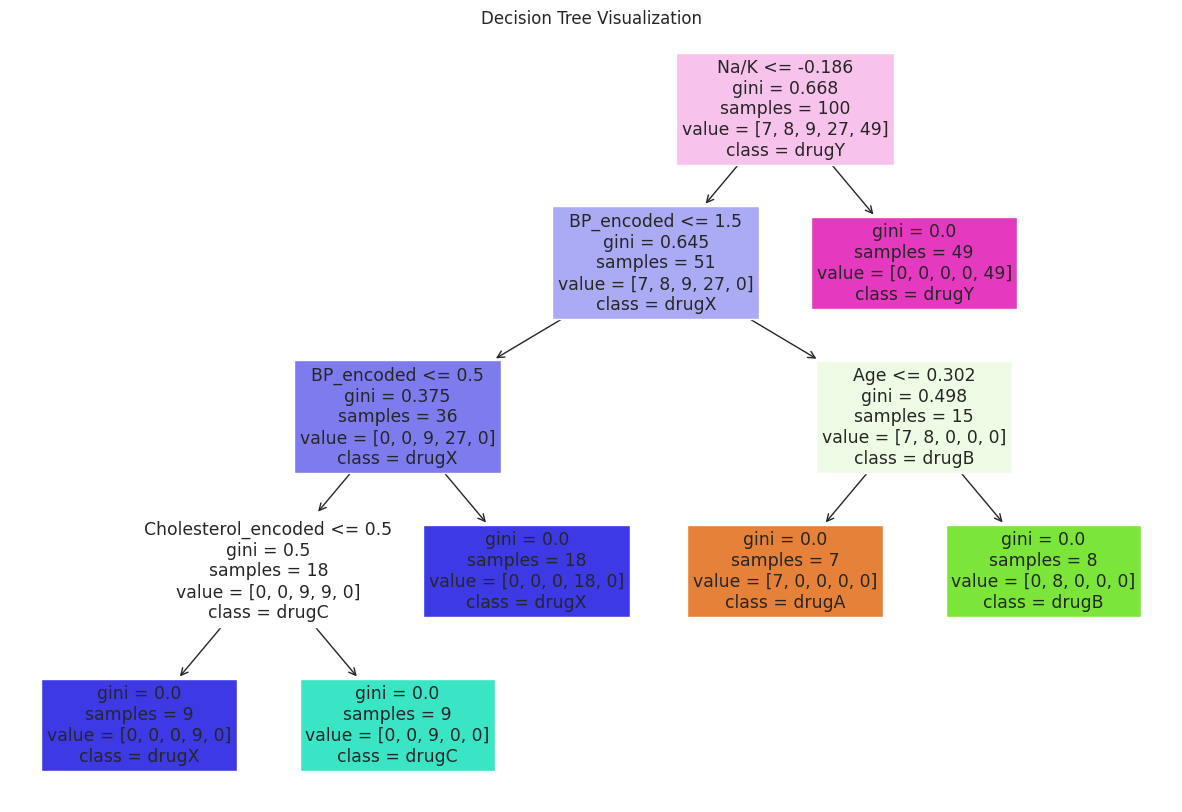

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_subset, y_train)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=features_to_use, class_names=sorted(df['Drug'].unique()))
plt.title("Decision Tree Visualization")
plt.show()

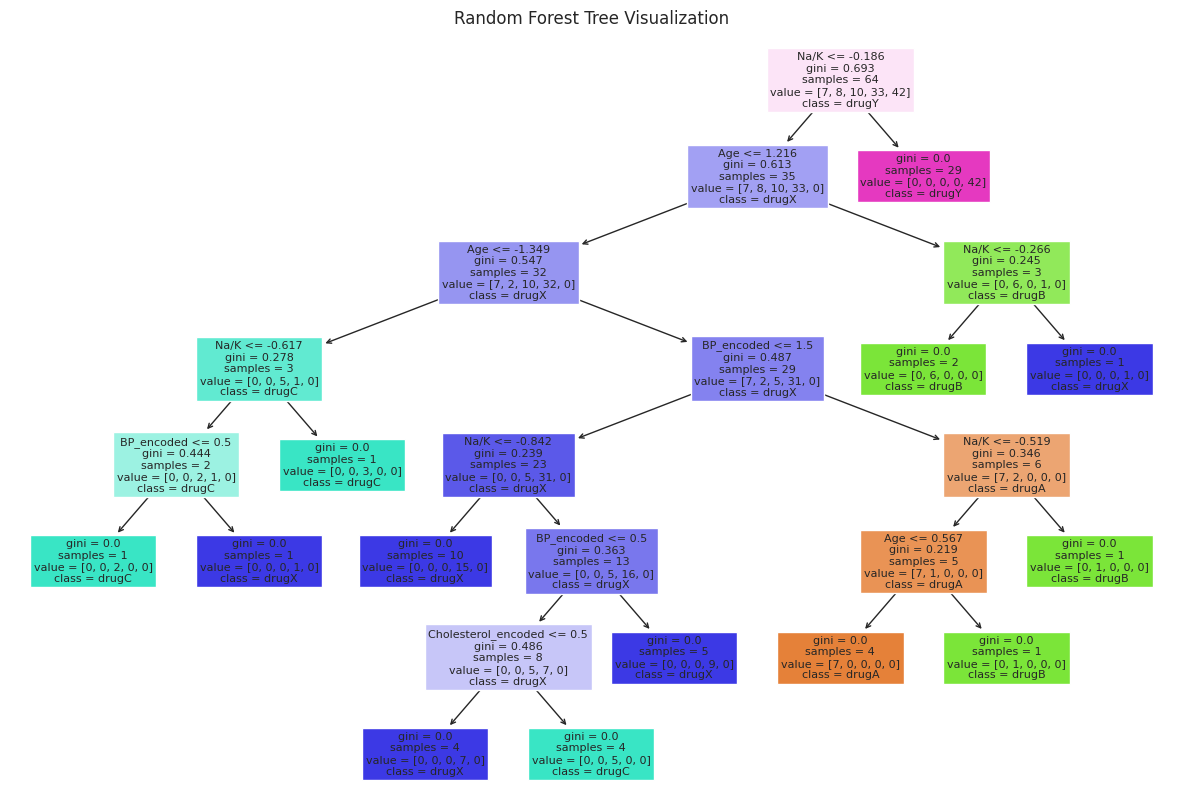

In [39]:
# Extract one tree from the Random Forest
single_tree = random_forest.estimators_[0]

# Plot the extracted tree
plt.figure(figsize=(15, 10))
plot_tree(single_tree, filled=True, feature_names=features_to_use, class_names=sorted(df['Drug'].unique()))
plt.title("Random Forest Tree Visualization")
plt.show()

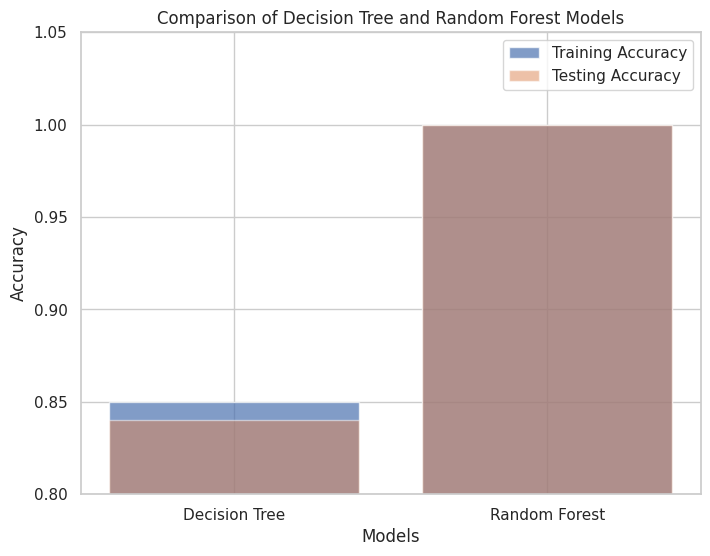

In [40]:
import matplotlib.pyplot as plt

# Accuracy scores for Decision Tree and Random Forest on training and testing datasets
accuracy_scores_train = [0.85, 1.00]  # Replace with actual accuracy scores
accuracy_scores_test = [0.84, 1.00]   # Replace with actual accuracy scores

# Labels for models
models = ['Decision Tree', 'Random Forest']

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores_train, alpha=0.7, label='Training Accuracy')
plt.bar(models, accuracy_scores_test, alpha=0.5, label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree and Random Forest Models')
plt.legend()
plt.ylim(0.8, 1.05)  # Set appropriate limits for y-axis
plt.show()
